### 13.2 LÓGICA FUZZY NO PYTHON

671.98579243603
[['comprar', 0.0], ['manter', 0.28014207563969995], ['vender', 0.35992896218015]]
Decisão Final
vender


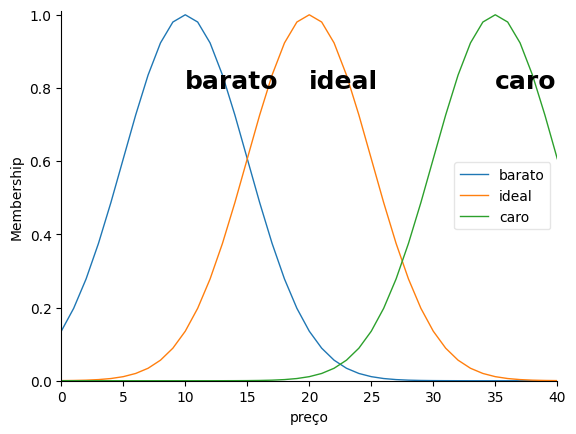

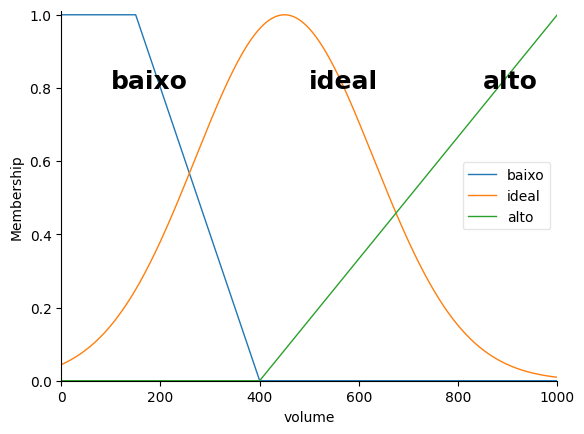

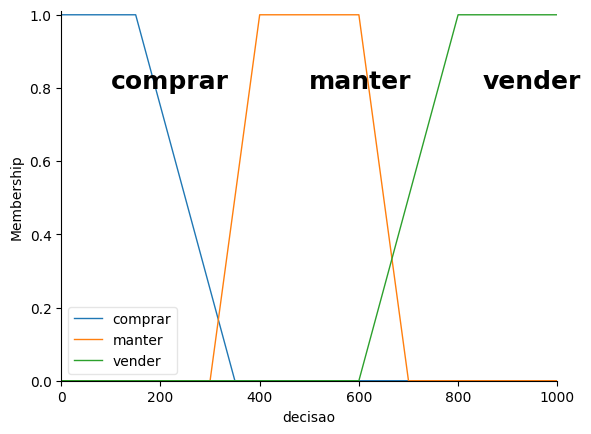

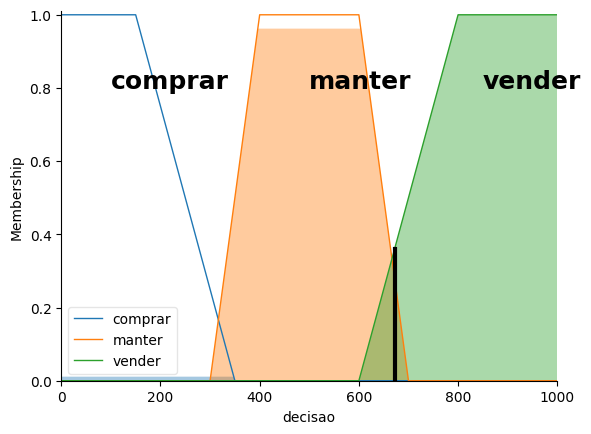

In [12]:
import skfuzzy as fuzz
from skfuzzy import control as ctl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

preco = ctl.Antecedent(np.arange(0,41,1),'preço')
vol = ctl.Antecedent(np.arange(0,1001,1),'volume')
dec = ctl.Consequent(np.arange(0,1001,1),'decisao')

# Função de pertinência para preços
preco['barato'] = fuzz.gaussmf(preco.universe,10,5)
preco['ideal'] = fuzz.gaussmf(preco.universe,20,5)
preco['caro'] = fuzz.gaussmf(preco.universe,35,5)

preco.view()

plt.text(x=10,y=0.8,s='barato',fontsize=18,weight='bold')
plt.text(x=20,y=0.8,s='ideal',fontsize=18,weight='bold')
plt.text(x=35,y=0.8,s='caro',fontsize=18,weight='bold')

# Função de pertinência para volumes
vol['baixo'] = fuzz.trapmf(vol.universe,[0,0,150,400])
vol['ideal'] = fuzz.gaussmf(vol.universe,450,180)
vol['alto'] = fuzz.trimf(vol.universe,[400,1000,1000])

vol.view()

plt.text(x=100,y=0.8,s='baixo',fontsize=18,weight='bold')
plt.text(x=500,y=0.8,s='ideal',fontsize=18,weight='bold')
plt.text(x=850,y=0.8,s='alto',fontsize=18,weight='bold')

# Função de pertinência para decisão final
dec['comprar'] = fuzz.trapmf(dec.universe,[0,0,150,350])
dec['manter'] = fuzz.trapmf(dec.universe,[300,400,600,700])
dec['vender'] = fuzz.trapmf(dec.universe,[600,800,1000,1000])

dec.view()

plt.text(x=100,y=0.8,s='comprar',fontsize=18,weight='bold')
plt.text(x=500,y=0.8,s='manter',fontsize=18,weight='bold')
plt.text(x=850,y=0.8,s='vender',fontsize=18,weight='bold')

# Regras da lógica fuzzy
regra1 = ctl.Rule(preco['barato'] & vol['baixo'], dec['comprar'])
regra2 = ctl.Rule(preco['barato'] & vol['alto'], dec['comprar'])
regra3 = ctl.Rule(preco['ideal'] | vol['baixo'], dec['comprar'])
regra4 = ctl.Rule(preco['ideal'] | vol['ideal'], dec['manter'])
regra5 = ctl.Rule(preco['ideal'] | vol['alto'], dec['vender'])
regra6 = ctl.Rule(preco['caro'] | vol['alto'], dec['vender'])

# sistema de criação de controle/simulação
decisao_ctl = ctl.ControlSystem([regra1,regra2,regra3,regra4,regra5,regra6])
decisao = ctl.ControlSystemSimulation(decisao_ctl)

# função de cálculo para a defuzzificação
def IndFzy(entrada):
    # Entrada
    decisao.input['preço'] = entrada[0]
    decisao.input['volume'] = entrada[1]
    # saída fuzzy
    decisao.compute()
    return(decisao.output['decisao'])

# valor fuzzy computado
res1 = IndFzy([35,400])
print(res1)
dec.view(sim=decisao)
plt.text(x=100,y=0.8,s='comprar',fontsize=18,weight='bold')
plt.text(x=500,y=0.8,s='manter',fontsize=18,weight='bold')
plt.text(x=850,y=0.8,s='vender',fontsize=18,weight='bold')

# decisão final
mval=[]

for t in dec.terms:
    s = np.interp(res1, dec.universe,dec[t].mf)
    mval.append([t,s])
    
print(mval)
mval = pd.DataFrame(mval)
ind_max = mval[1].idxmax()
print("Decisão Final")
print(mval[0][ind_max])

### 13.3 INTELIGÊNCIA ARTIFICIAL NA BOVESPA

[*********************100%***********************]  1 of 1 completed


IndexError: index 4 is out of bounds for axis 1 with size 3

<Figure size 1200x600 with 0 Axes>

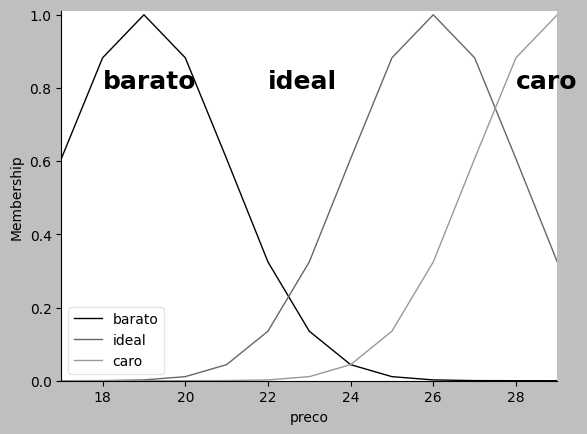

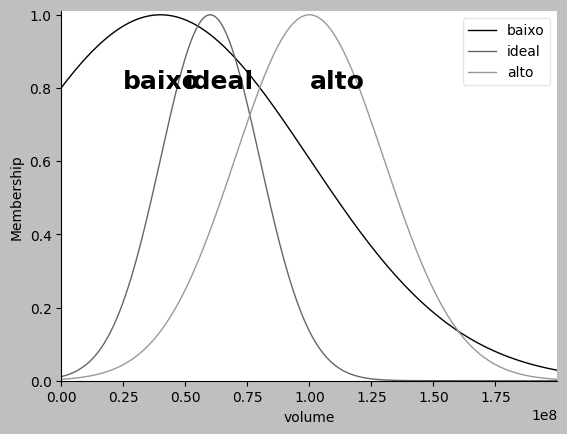

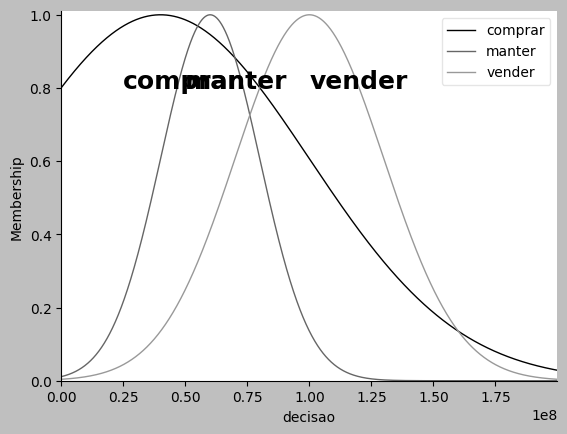

In [6]:
import skfuzzy as fuzz
from skfuzzy import control as ctl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.mlab as mlab
import pandas_datareader.data as pdr
import datetime as dt
import yfinance as yf

yf.pdr_override()

plt.style.use('grayscale')

# eixo das abcissas para as fun. pertinência
preco = ctl.Antecedent(np.arange(17,30,1),'preco')
vol = ctl.Antecedent(np.arange(0,2e8,1e5),'volume')
dec = ctl.Consequent(np.arange(0,2e8,1e5),'decisao')

# Função de pertinência para preços
preco['barato'] = fuzz.gaussmf(preco.universe,19,2)
preco['ideal'] = fuzz.gaussmf(preco.universe,26,2)
preco['caro'] = fuzz.gaussmf(preco.universe,29,2)

preco.view()

plt.text(x=18,y=0.8,s='barato',fontsize=18,weight='bold')
plt.text(x=22,y=0.8,s='ideal',fontsize=18,weight='bold')
plt.text(x=28,y=0.8,s='caro',fontsize=18,weight='bold')

# Função de pertinência para volumes
vol['baixo'] = fuzz.gaussmf(vol.universe,0.4e8,6e7)
vol['ideal'] = fuzz.gaussmf(vol.universe,0.6e8,2e7)
vol['alto'] = fuzz.gaussmf(vol.universe,1e8,3e7)

vol.view()

plt.text(x=0.25e8,y=0.8,s='baixo',fontsize=18,weight='bold')
plt.text(x=0.5e8,y=0.8,s='ideal',fontsize=18,weight='bold')
plt.text(x=1e8,y=0.8,s='alto',fontsize=18,weight='bold')

# Função de pertinência para decisão final
dec['comprar'] = fuzz.gaussmf(dec.universe,0.4e8,6e7)
dec['manter'] = fuzz.gaussmf(dec.universe,0.6e8,2e7)
dec['vender'] = fuzz.gaussmf(dec.universe,1e8,3e7)

dec.view()

plt.text(x=0.25e8,y=0.8,s='comprar',fontsize=18,weight='bold')
plt.text(x=0.5e8,y=0.8,s='manter',fontsize=18,weight='bold')
plt.text(x=1e8,y=0.8,s='vender',fontsize=18,weight='bold')

# Regras da lógica fuzzy
regra1 = ctl.Rule(preco['barato'] & vol['baixo'], dec['comprar'])
regra2 = ctl.Rule(preco['barato'] & vol['alto'], dec['comprar'])
regra3 = ctl.Rule(preco['ideal'] | vol['baixo'], dec['comprar'])
regra4 = ctl.Rule(preco['ideal'] | vol['ideal'], dec['manter'])
regra5 = ctl.Rule(preco['ideal'] | vol['alto'], dec['vender'])
regra6 = ctl.Rule(preco['caro'] | vol['alto'], dec['vender'])

# sistema de criação de controle/simulação
decisao_ctl = ctl.ControlSystem([regra1,regra2,regra3,regra4,regra5,regra6])
decisao = ctl.ControlSystemSimulation(decisao_ctl)

# função de cálculo para a defuzzificação
def IndFzy(entrada):
    # Entrada
    decisao.input['preco'] = entrada[0]
    decisao.input['volume'] = entrada[1]
    # saída fuzzy
    decisao.compute()
    return(decisao.output['decisao'])

# valor fuzzy computado

# decisão final
inicio = dt.datetime(2019,3,1)
final = dt.datetime(2019,5,15)

df = pdr.get_data_yahoo("PETR4.SA",inicio,final)
#df.head(5)

mval  = np.zeros((len(df),3))

for i in range(len(df)):
    res1 = IndFzy([df['Close'].values[i],df['Volume'].values[i]])
    j=0
    for t in dec.terms:
        s = np.interp(res1, dec.universe, dec[t].mf)
        mval[i,j] = s
        j=j+i
        
mval = pd.DataFrame(mval,columns=['comprar','manter','vender'])
dec_fuzzy = mval.idxmax(axis=1)
print("      Decisão Final")
print(dec_fuzzy)
print("==========================================================")

dec.view(sim=decisao)
plt.text(x=0.25e8,y=0.8,s='comprar',fontsize=18,weight='bold')
plt.text(x=0.5e8,y=0.8,s='manter',fontsize=18,weight='bold')
plt.text(x=1e8,y=0.8,s='vender',fontsize=18,weight='bold')

figura = plt.figure(figsize=(12,6))
ax1 = plt.subplot(111)
plt.title("Petrobras - PETR4")

ax1.plot(df.index,df['Close'],'--k')
ax1.set_ylabel('PETR4',fontsize=18,weight='bold')

for i in range(len(dec_fuzzy)):
    ax1.text(x=df.index[i],y=df['Close'].values[i],s=str(dec_fuzzy[i]),
             fontsize=12,color='black',weight='bold')
    
ax2 = ax1.twinx()
ax2.plot(df.index,df['Volume'],color='black')
ax2.set_ylabel('VOLUME',fontsize=18,weight='bold')